In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
pd.plotting.register_matplotlib_converters()
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading from the file 
manf_data = pd.read_csv("C:\\Users\\JAMIN\\OneDrive\\Desktop\\data_sets\\manfacturing_dataset.zip")

#printing out the first 5 rows of the data
manf_data.head()

,Timestamp,Machine_ID,Operation_Mode,Temperature_C,Vibration_Hz,Power_Consumption_kW,Network_Latency_ms,Packet_Loss_%,Quality_Control_Defect_Rate_%,Production_Speed_units_per_hr,Predictive_Maintenance_Score,Error_Rate_%,Efficiency_Status
0,2024-01-01 00:00:00,39,Idle,74.137590,3.500595,8.612162,10.650542,0.207764,7.751261,477.657391,0.344650,14.965470,Low
1,2024-01-01 00:01:00,29,Active,84.264558,3.355928,2.268559,29.111810,2.228464,4.989172,398.174747,0.769848,7.678270,Low
2,2024-01-01 00:02:00,15,Active,44.280102,2.079766,6.144105,18.357292,1.639416,0.456816,108.074959,0.987086,8.198391,Low
3,2024-01-01 00:03:00,43,Active,40.568502,0.298238,4.067825,29.153629,1.161021,4.582974,329.579410,0.983390,2.740847,Medium
4,2024-01-01 00:04:00,8,Idle,75.063817,0.345810,6.225737,34.029191,4.796520,2.287716,159.113525,0.573117,12.100686,Low


In [3]:
#printing the data info
manf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Timestamp                      100000 non-null  object 
 1   Machine_ID                     100000 non-null  int64  
 2   Operation_Mode                 100000 non-null  object 
 3   Temperature_C                  100000 non-null  float64
 4   Vibration_Hz                   100000 non-null  float64
 5   Power_Consumption_kW           100000 non-null  float64
 6   Network_Latency_ms             100000 non-null  float64
 7   Packet_Loss_%                  100000 non-null  float64
 8   Quality_Control_Defect_Rate_%  100000 non-null  float64
 9   Production_Speed_units_per_hr  100000 non-null  float64
 10  Predictive_Maintenance_Score   100000 non-null  float64
 11  Error_Rate_%                   100000 non-null  float64
 12  Efficiency_Status              

In [5]:
manf_data.shape

(100000, 13)

In [10]:
#checking for unique values of the data
categorical_col = manf_data.select_dtypes(include=['object']).columns
for col in categorical_col:
    print(f"\n The unique values in {col}: is {manf_data[col].unique()}")


 The unique values in Timestamp: is ['2024-01-01 00:00:00' '2024-01-01 00:01:00' '2024-01-01 00:02:00' ...
 '2024-03-10 10:37:00' '2024-03-10 10:38:00' '2024-03-10 10:39:00']

 The unique values in Operation_Mode: is ['Idle' 'Active' 'Maintenance']

 The unique values in Efficiency_Status: is ['Low' 'Medium' 'High']


In [12]:
#droping the values of the Timestamp
manf_data.drop(columns=['Timestamp'],inplace=True)

In [14]:
#Encoding the data types that are strings into intagers using maping
manf_data['Efficiency_Status'] = manf_data['Efficiency_Status'].map({'Low':1,'Medium':2,'High':3})

from sklearn.preprocessing import LabelEncoder,StandardScaler
le = LabelEncoder()
manf_data['Operation_Mode'] = le.fit_transform(manf_data['Operation_Mode'])

array([[<Axes: title={'center': 'Machine_ID'}>,
        <Axes: title={'center': 'Operation_Mode'}>,
        <Axes: title={'center': 'Temperature_C'}>],
       [<Axes: title={'center': 'Vibration_Hz'}>,
        <Axes: title={'center': 'Power_Consumption_kW'}>,
        <Axes: title={'center': 'Network_Latency_ms'}>],
       [<Axes: title={'center': 'Packet_Loss_%'}>,
        <Axes: title={'center': 'Quality_Control_Defect_Rate_%'}>,
        <Axes: title={'center': 'Production_Speed_units_per_hr'}>],
       [<Axes: title={'center': 'Predictive_Maintenance_Score'}>,
        <Axes: title={'center': 'Error_Rate_%'}>,
        <Axes: title={'center': 'Efficiency_Status'}>]], dtype=object)

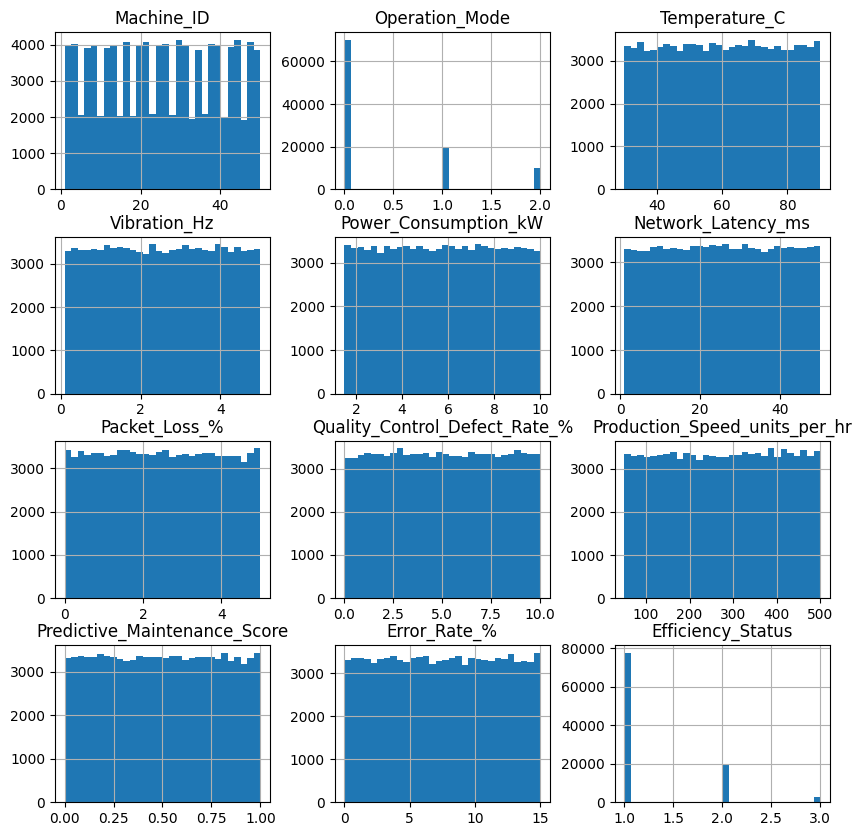

In [22]:
#ploting a histogram to look at the distribution of the column
manf_data.hist(figsize=(10,10),bins=30)

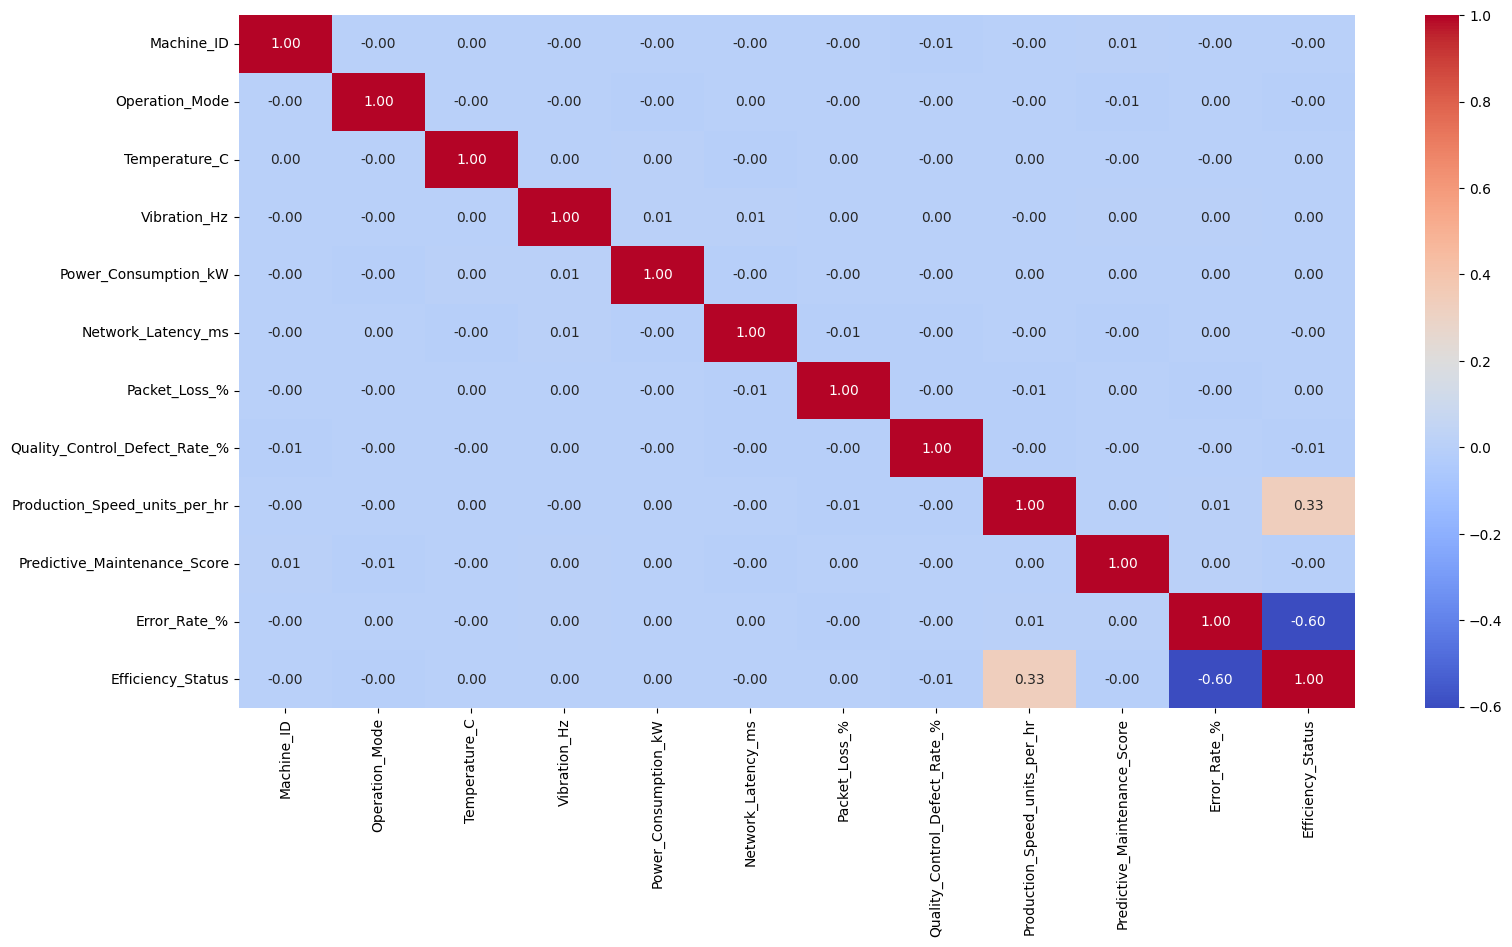

In [30]:
#creating a corrilation graph to visualise the datap
plt.figure(figsize=(18,9))
sns.heatmap(manf_data.corr(),annot=True,cmap='coolwarm',fmt='.2f')
plt.show()

In [ ]:
#Creating the target and the features of the data to train the model
X = manf_data.drop(columns=['Efficiency_Status'])
Y = manf_data['Efficiency_Status']

In [36]:
#creating a model
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error,classification_report,accuracy_score
from sklearn.model_selection import train_test_split


In [37]:
#spliting the data into traing and testing sets
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=42,test_size=0.2)

In [ ]:
#Defing the models
models = {
    'RandomForestClassifier':RandomForestClassifier(n_estimators=1000,random_state=42),
    'SVC':SVC(),
    'GradientBoostingClassifier':GradientBoostingClassifier(n_estimators=1000),
    'LogisticRegression':LogisticRegression()
}

In [39]:
results= {}
for name,model in models.items():
    #fitting the model
    model.fit(X_train,Y_train)
    #making predictions
    pred = model.predict(X_test)
    #calculaing the mean absolute error
    mae = mean_absolute_error(Y_test,pred)
    accuracy = accuracy_score(Y_test,pred)
    results[name] = accuracy
    print(f"\n{name} Accuracy {accuracy:.2f}")
    print(classification_report(Y_test,pred))



RandomForestClassifier Accuracy 1.00
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     15464
           2       1.00      1.00      1.00      3911
           3       1.00      1.00      1.00       625

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000


SVC Accuracy 0.95
              precision    recall  f1-score   support

           1       0.98      0.99      0.99     15464
           2       0.83      0.93      0.88      3911
           3       0.00      0.00      0.00       625

    accuracy                           0.95     20000
   macro avg       0.61      0.64      0.62     20000
weighted avg       0.92      0.95      0.94     20000


GradientBoostingClassifier Accuracy 1.00
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     15464
           2       1.00      1